## Predictive Modeling for Consumer Behavior

## Ammar Alhoraibi


### Introduction
- In this laboratory session, our focus is on a dataset related to social advertisements, encompassing two variables: age, estimated salary, and purchase behavior. We aim to employ five distinct machine learning models to categorize whether a user, characterized by a specific age and salary, will make a purchase of the provided product or not. Our objective involves analyzing the dataset, considering both age and estimated salary, and utilizing various machine learning models to predict the purchase behavior of users in response to the advertised product.

### Loading dataset

In [30]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [31]:
#loading the dataset using pandas library
df = pd.read_csv("SocialAds.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


- o	Downloading the CSV file on the machine and opening it in Jupyter notebooks using the Pandas library. Displaying the head of the dataset to have a look at the variables and first 5 rows. 

#### Quick look on dataset

In [32]:
#getting information about consistency of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              398 non-null    float64
 1   EstimatedSalary  396 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


- The function displays information of the dataset. Showing that we have 3 coulmns , 400 rows, as well as the data type of each column.

In [33]:
#getting summary for numerical attributes of dataset
df.describe()

,Age,EstimatedSalary,Purchased
count,398.000000,396.00000,400.000000
mean,37.658291,69969.69697,0.357500
std,10.480103,34112.23606,0.479864
min,18.000000,15000.00000,0.000000
25%,30.000000,43000.00000,0.000000
50%,37.000000,70000.00000,0.000000
75%,46.000000,88000.00000,1.000000
max,60.000000,150000.00000,1.000000


- The functions generates descriptive statistics thats summarizethe centeral tendency and many.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

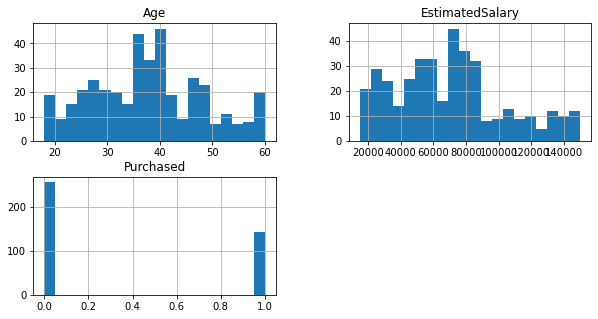

In [135]:
#gsaining more insights on distribution of attributes
%matplotlib inline  
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

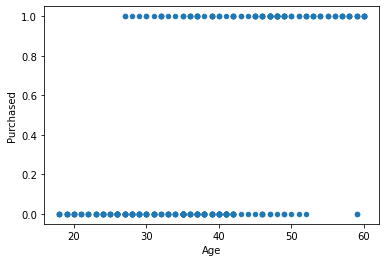

In [34]:
df.plot(kind='scatter', x='Age', y='Purchased')

- The graph shows the variance of the Purshased VS Age

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

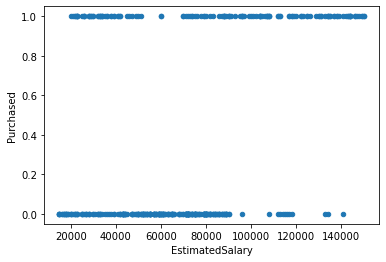

In [35]:
df.plot(kind='scatter', x='EstimatedSalary', y='Purchased')

- The graph shows the variance of the Purshased VS Estimated Salary

In [36]:
corr_matrix = df.corr()
corr_matrix

,Age,EstimatedSalary,Purchased
Age,1.000000,0.159015,0.620612
EstimatedSalary,0.159015,1.000000,0.368038
Purchased,0.620612,0.368038,1.000000


- The correlation matrix shows that the correlation between the variables 

In [37]:
#Sort the correlation between Purshaced and other variables in descending order
corr_matrix['Purchased'].sort_values(ascending=False)

Purchased          1.000000
Age                0.620612
EstimatedSalary    0.368038
Name: Purchased, dtype: float64

- The correlation matrix shows the correlation between age and estimated salary with purchased. The relationship between age and purchased is stronger which is equal to 62%, and it is equal to 36% with estimated salary.

###  Discover and Visualize the Data to gain insights

In [38]:
attributes1 = ['Age', 'EstimatedSalary']
X = df.loc[:, attributes1]
Y = df.loc[:, ['Purchased']]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, train_size = .8)

- The First step to prepare the data is to Create variables for each column and assign them x and y to separate them. The independent is x and the dependent that we want to predict is y. 
- Split the data into train and test sets; using 80% of the data set for training and the rest for testing.


#### Check if there are missing values and replace them¶

In [40]:
X_train.isna().sum()

Age                1
EstimatedSalary    4
dtype: int64

In [41]:
X_train.iloc[:, 0] = X_train.iloc[:, 0].fillna(X_train.iloc[:, 0].mean())

X_train.iloc[:, 1] = X_train.iloc[:, 1].fillna(X_train.iloc[:, 1].mean())

X_train.head(3)

,Age,EstimatedSalary
145,24.0,89000.0
387,39.0,71000.0
44,28.0,84000.0


In [42]:
X_test.isna().sum()

Age                1
EstimatedSalary    0
dtype: int64

In [43]:
X_test.iloc[:, 0] = X_test.iloc[:, 0].fillna(X_test.iloc[:, 0].mean())

X_train.head(3)

,Age,EstimatedSalary
145,24.0,89000.0
387,39.0,71000.0
44,28.0,84000.0


- Here we replace the null vallues with the mean value of each cloumn

In [44]:
Y_train.isna().sum()

Purchased    0
dtype: int64

In [45]:
Y_test.isna().sum()

Purchased    0
dtype: int64

- no null values in the Purshaced column

In [76]:
#reshaping the data
import numpy as np
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
Y_train_arr = np.array(Y_train)
Y_test_arr = np.array(Y_test)

- converting the series to an arrayto compatible and efficient data structure for numerical computations and modeling algorithms

## Linear SVC 

In [79]:
svm_clf = Pipeline([ ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),])

svm_clf.fit(X_train_arr,Y_train_arr.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [81]:
lin_predict = svm_clf.predict(X_test_arr) 
lin_predict

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
#Evaluation using confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_arr, lin_predict)

array([[52,  2],
       [11, 15]], dtype=int64)

In [93]:
#Evaluation using precision_score, recall_score, accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Perciion :", precision_score(Y_test_arr, lin_predict))
print("recall :", recall_score(Y_test_arr, lin_predict))
print("accuracy :", accuracy_score(Y_test_arr, lin_predict))

Perciion : 0.8823529411764706
recall : 0.5769230769230769
accuracy : 0.8375


- Following data preparation, let's begins with the Linear SVC model.
- The performance of the model is satisfactory.
- For evaluation, metrics such as confusion matrix, precision, recall, and accuracy are employed.
- The precision of the model is determined to be 88%, with a recall of 57% and an accuracy of 83%.
- These metrics will be compared with those of other models later to identify the one with the highest values.

## SVC Linear Kernel

In [80]:
lin_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="linear"))
     ])
lin_kernel_svm_clf.fit(X_train_arr, Y_train_arr.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(kernel='linear'))])

In [71]:
lin_ker= lin_kernel_svm_clf.predict(X_test_arr) 
lin_ker

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
#Evaluation using confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_arr, lin_ker)

array([[52,  2],
       [11, 15]], dtype=int64)

In [96]:
#Evaluation using precision_score, recall_score, accuracy
print("Perciion :", precision_score(Y_test_arr, lin_ker))
print("recall :", recall_score(Y_test_arr, lin_ker))
print("accuracy :", accuracy_score(Y_test_arr, lin_ker))

Perciion : 0.8823529411764706
recall : 0.5769230769230769
accuracy : 0.8375


- Presented is the SVC Linear Kernel model.
- The model exhibits similar performance to the standard SVC model.
- Precision stands at 88%, recall at 57%, and accuracy at 83%.
- All evaluation metrics retain identical values between the two models.

## SGD Classifier

In [84]:
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter= 1000, tol= 1e-3))
clf.fit(X_train_arr, Y_train_arr.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [85]:
sgd= clf.predict(X_test_arr) 
sgd

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
#Evaluation using confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_arr, sgd)

array([[49,  5],
       [ 6, 20]], dtype=int64)

In [97]:
#Evaluation using precision_score, recall_score, accuracy
print("Perciion :", precision_score(Y_test_arr, sgd))
print("recall :", recall_score(Y_test_arr, sgd))
print("accuracy :", accuracy_score(Y_test_arr, sgd))

Perciion : 0.8
recall : 0.7692307692307693
accuracy : 0.8625


- Next is the SGD model.
- Performance-wise, the model falls short compared to the previous two models in terms of precision but perform better in terms of recall, and accuracy.
- Precision is recorded at 80%, recall at 76%, while accuracy is comparatively higher at 86%.

## SVC RBF Kernel

In [88]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel= "rbf", random_state= 0))
    ])
rbf_kernel_svm_clf.fit(X_train_arr,Y_train_arr.ravel())

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(random_state=0))])

In [89]:
rbf_ker= rbf_kernel_svm_clf.predict(X_test_arr)
rbf_ker

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [162]:
#Evaluation using confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_arr, rbf_ker)

array([[181,  22],
       [ 12, 105]], dtype=int64)

In [98]:
#Evaluation using precision_score, recall_score, accuracy
print("Perciion :", precision_score(Y_test_arr, rbf_ker))
print("recall :", recall_score(Y_test_arr, rbf_ker))
print("accuracy :", accuracy_score(Y_test_arr, rbf_ker))

Perciion : 0.92
recall : 0.8846153846153846
accuracy : 0.9375


- Provided is the SVC RBF Kernel model.
- The model demonstrates superior performance compared to previous models.
- Precision stands at 93%, recall at 88%, and accuracy at 93%.

## SVC RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svc_random = SVC()

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc_random, param_distributions,
                                   n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_arr, Y_train_arr.ravel())


In [100]:
rnd_search= rnd_search_cv.predict(X_test_arr)
rnd_search

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
#Evaluation using confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_arr, rnd_search)

array([[50,  4],
       [13, 13]], dtype=int64)

In [102]:
#Evaluation using precision_score, recall_score, accuracy
print("Perciion :", precision_score(Y_test_arr, rnd_search))
print("recall :", recall_score(Y_test_arr, rnd_search))
print("accuracy :", accuracy_score(Y_test_arr, rnd_search))

Perciion : 0.7647058823529411
recall : 0.5
accuracy : 0.7875


- The least model is SVC RBF Kernel model.
- The model demonstrates the worst performance compared to previous models.
- Precision stands at 76%, recall at 50%, and accuracy at 78%.

### Conclusion
- The evaluation shows that the SVC RBF Kernel model is the most promising model to predict the purchased using the age and estimated salary.